# Plotting the Technological NN for Binary Output Classification

This section presents a visualization of the architecture of the Technological Neural Network (NN) model, which is designed for binary output classification. This model is particularly well-suited for scenarios that require the classification of data based on a set of features into one of two possible outcomes (0 or 1).

## Technological Model Architecture

This model is designed to classify seven input features into a binary output (0 or 1). It is a simple yet effective neural network that consists of the following layers:

- **Input Layer**: 
  - **Shape**: (7,) - This layer accepts input data with seven features.
- **Hidden Layers**:
  - **Dense Layer 1**: 
    - **Units**: 12 neurons
    - **Activation Function**: ReLU (Rectified Linear Unit)
    - **Regularization**: L2 regularization with a factor of 0.01 to prevent overfitting.
  - **Dense Layer 2**: 
    - **Units**: 8 neurons
    - **Activation Function**: ReLU
    - **Regularization**: L2 regularization with a factor of 0.01.
- **Output Layer**:
  - **Dense Layer 3**: 
    - **Units**: 1 neuron
    - **Activation Function**: Sigmoid
    - **Purpose**: Outputs a single probability value that is used to classify the input as either 0 or 1.

### Data Source

The data for this model is typically sourced from a CSV file, which contains the seven features that the model uses to make its classification. This type of scenario is common in technological settings where binary classification is required, such as determining whether a machine is functioning properly (1) or malfunctioning (0), or predicting whether a customer will buy a product (1) or not (0).

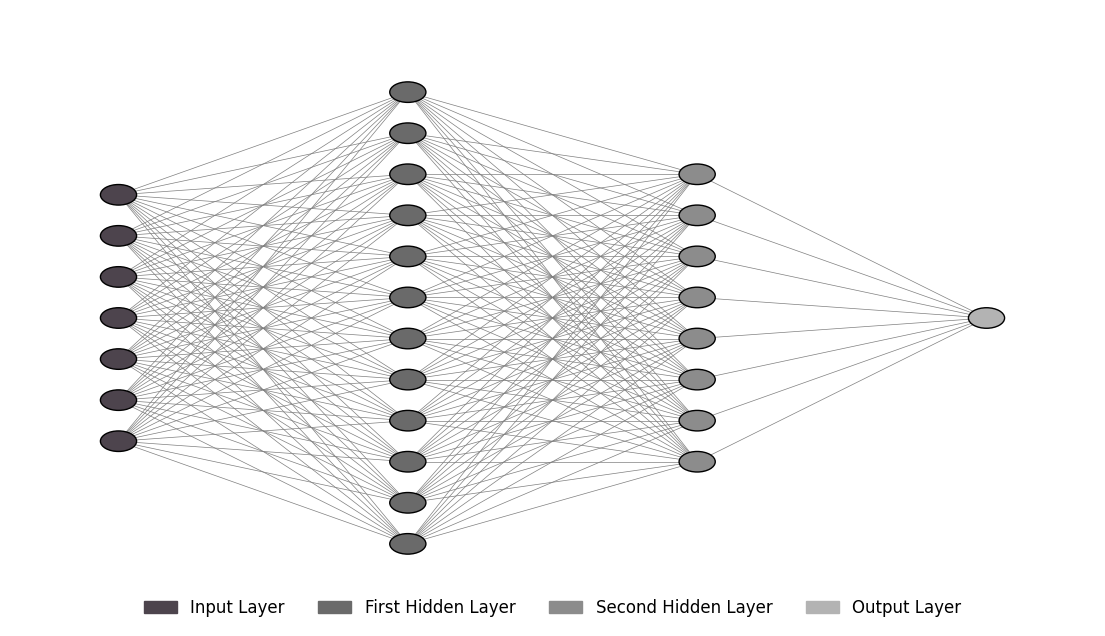

In [1]:
# Importing required packages 
import matplotlib.pyplot as plt # version: 3.9.0
import matplotlib.patches as mpatches # version: 3.9.0

# Defining function to plot the Medical Neural Network
def draw_neural_net(ax, left, right, bottom, top, layer_sizes, line_width=0.2):
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodes
    for i, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        color = 'w'
        if i == 0:
            color = '#4d444d'  # Dark gray for Input Layer
        elif i == len(layer_sizes) - 1:
            color = '#b3b3b3'  # Light gray for Output Layer
        else:
            color = '#6a6a6a' if i == 1 else '#8c8c8c'  # Different gray for Hidden Layers
        for j in range(layer_size):
            circle = plt.Circle((i*h_spacing + left, layer_top - j*v_spacing), v_spacing/4.,
                                color=color, ec='k', zorder=4)
            ax.add_artist(circle)

    # Edges
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for j in range(layer_size_a):
            for k in range(layer_size_b):
                line = plt.Line2D([i*h_spacing + left, (i + 1)*h_spacing + left],
                                  [layer_top_a - j*v_spacing, layer_top_b - k*v_spacing],
                                  c='#7f7f7f', lw=line_width)  # Mid-gray Lines for edges
                ax.add_artist(line)

fig = plt.figure(figsize=(14, 8))
ax = fig.gca()
ax.axis('off')
layer_sizes = [7, 12, 8, 1]  # Adjusted to match technological model
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes, line_width=0.5)

# Creating subdued colored patches for the legend
input_patch = mpatches.Patch(color='#4d444d', label='Input Layer')
hidden1_patch = mpatches.Patch(color='#6a6a6a', label='First Hidden Layer')
hidden2_patch = mpatches.Patch(color='#8c8c8c', label='Second Hidden Layer')
output_patch = mpatches.Patch(color='#b3b3b3', label='Output Layer')

# Adding a centered legend with a lifted position
plt.legend(handles=[input_patch, hidden1_patch, hidden2_patch, output_patch],
           loc='lower center', bbox_to_anchor=(0.5, -0.01), fancybox=False, fontsize='large', shadow=False, frameon=False, ncol=4)

plt.show()

# Plotting the Medical NN for Multi-Class Image Classification

This section provides a visualization of the architecture of the Medical Neural Network (NN) model designed for image classification. The model is specifically tailored to classify medical images, such as X-rays, into distinct categories.

## Medical Model Architecture

This model is designed to classify images into two categories: "lung" and "not lung". It uses a combination of convolutional layers to extract features from the images and fully connected layers to make the final classification.

- **Input Layer**: 
  - **Shape**: (128, 128, 3) - This layer accepts input images of size 128x128 pixels with three color channels (RGB).
- **Convolutional Layers**:
  - **Conv2D Layer 1**: 
    - **Filters**: 16
    - **Kernel Size**: 3x3
    - **Activation Function**: ReLU (Rectified Linear Unit)
    - **Padding**: Same (preserves the spatial dimensions of the input)
  - **MaxPooling2D Layer 1**: 
    - **Pool Size**: 2x2 (reduces the spatial dimensions by half)
  - **Conv2D Layer 2**: 
    - **Filters**: 32
    - **Kernel Size**: 3x3
    - **Activation Function**: ReLU
    - **Padding**: Same
  - **MaxPooling2D Layer 2**: 
    - **Pool Size**: 2x2 (further reduces the spatial dimensions)
- **Flatten Layer**: 
  - Converts the 2D feature maps into a 1D vector, preparing the data for the fully connected layers.
- **Fully Connected (Dense) Layers**:
  - **Dense Layer 1**: 
    - **Units**: 64 neurons
    - **Activation Function**: ReLU
- **Output Layer**:
  - **Dense Layer 2**: 
    - **Units**: 2 neurons
    - **Activation Function**: Softmax
    - **Purpose**: Outputs a probability distribution over the two classes, "lung" and "not lung".

### Data Source and Application

The model is trained on a dataset that includes X-ray images for the "lung" category (e.g., Pneumonia X-rays) and images from the MNIST dataset for the "not lung" category. The use of MNIST data as negative examples (not lung) helps the model distinguish between images that depict lungs and those that do not.

This type of model is valuable in medical image analysis, where it can assist in the automated classification of X-rays and potentially speed up the diagnostic process.

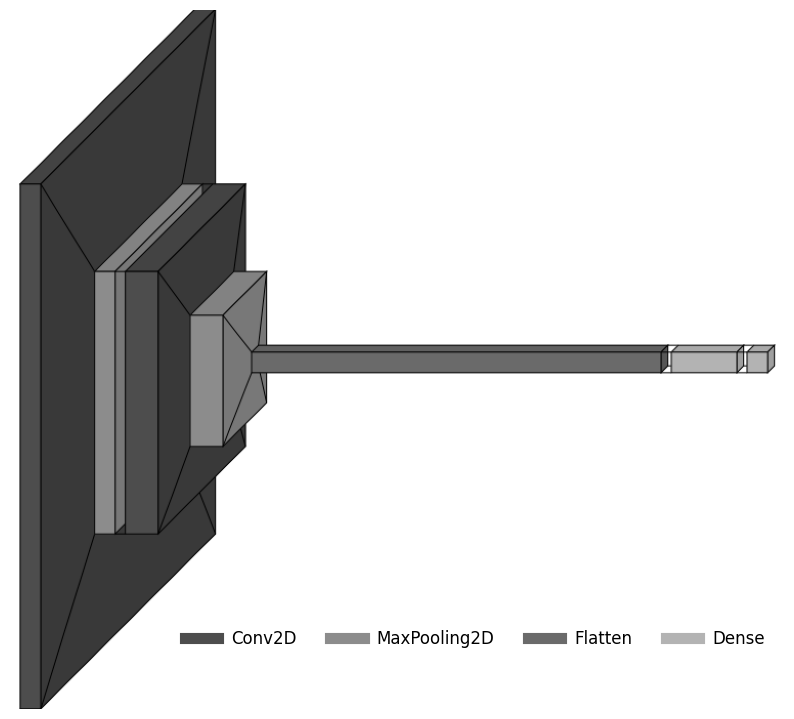

In [2]:
# Importing required packages
import os # version Python: 3.10.12
import warnings # Standard Library

# Disabling oneDNN and suppress TensorFlow logging messages
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Suppressing the specific TensorFlow warning
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

# Suppressing the specific warning from visualkeras
warnings.filterwarnings('ignore', category=UserWarning, message=".*legend_text_spacing_offset.*")

# Importing required packages 
import tensorflow as tf # version: 2.14.1
import visualkeras # version: 0.1.3
from tensorflow.keras.models import Sequential # version: 2.14.1
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # version: 2.14.1
from PIL import Image # version: 9.0.1
import matplotlib.pyplot as plt # version: 3.9.0

# Defining the Medical model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),   # 64 units
    Dense(2, activation='softmax')  # 2 units
])

# Color mapping to match the grayscale tones used in the matplotlib diagram
color_map = {
    Conv2D: {'fill': '#4d4d4d', 'outline': 'black'},  # Light gray for Conv layers
    MaxPooling2D: {'fill': '#8c8c8c', 'outline': 'black'},  # Darker gray for MaxPool layers
    Flatten: {'fill': '#6a6a6a', 'outline': 'black'},  # Lightest gray for Flatten layer
    Dense: {'fill': '#b3b3b3', 'outline': 'black'}  # Dark gray for Dense layers
}

# Create the layered view
visual = visualkeras.layered_view(
    model, 
    color_map=color_map, 
    legend=False,
    scale_z=1  # Keep consistent scaling
)

# Save the model visualization to a file
visual.save("medicalNN_architecture.png")

# Load the saved image and plot it with custom legend adjustments
img = Image.open("medicalNN_architecture.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')

# Creating the custom legend
handles = [
    plt.Line2D([0], [0], color='#4d4d4d', lw=8),
    plt.Line2D([0], [0], color='#8c8c8c', lw=8),
    plt.Line2D([0], [0], color='#6a6a6a', lw=8),
    plt.Line2D([0], [0], color='#b3b3b3', lw=8)
]
labels = ['Conv2D', 'MaxPooling2D', 'Flatten', 'Dense']

# Adjusting custom legend
plt.legend(handles=handles, labels=labels, loc='center', fontsize='large', frameon=False, ncol=4, bbox_to_anchor=(0.6, 0.1))

plt.show()

# Summary

This notebook provides visualizations of the architectures of both the Technological and Medical Neural Networks, each designed for specific classification tasks. These visualizations elucidate the layer structures and data flow within the models, which are critical for fine-tuning and optimizing the networks for their respective applications, such as medical diagnostics.

In [3]:
from datetime import datetime

# Print the current date and time
print("This workbook was last run on:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

This workbook was last run on: 2024-08-31 15:11:32
